In [ ]:
#for giving an array 
import numpy as np
#for Data Analysis
import pandas as pd
#For drawing 2D Graphs
import matplotlib.pyplot as plt
%matplotlib inline
#For drawing 3D graph
import seaborn as sns
import scipy.stats as stats
#Splitting the data into train and test using the sklearn.model_selection libray
from sklearn.model_selection import train_test_split
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Using the in built DecisionTreeClassifier alogrithm
from sklearn.tree import DecisionTreeClassifier
#Calculating the cross val score using sklearn libray
from sklearn.model_selection import cross_val_score
#Getting the accuracy and claassification report
from sklearn.metrics import  accuracy_score, classification_report,confusion_matrix
from sklearn import metrics
#Using k fold cross validation
from sklearn.model_selection import StratifiedKFold
#using the in bulit Random Forest alogrithm
from sklearn.ensemble import RandomForestClassifier
#Roc-Auc Score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

Data Preprocessing

In [ ]:
#Reading the file
glass_data = pd.read_csv("Glass_Identification_Data.csv")
#getting top 5 rows from dataframe
glass_data.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass_data.shape

(214, 11)

In [ ]:
#Check the null values
glass_data.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [ ]:
#Statistical Information
glass_data.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Data Visualization

Counting the type of glass

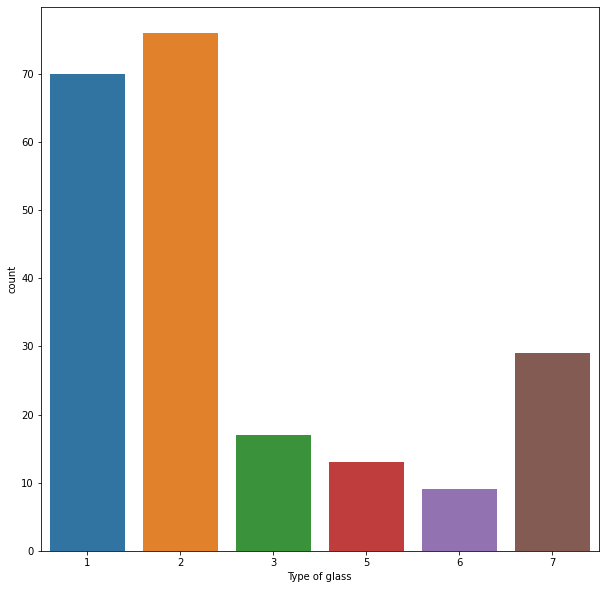

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='Type of glass', data=glass_data)

Checking distribution of the features

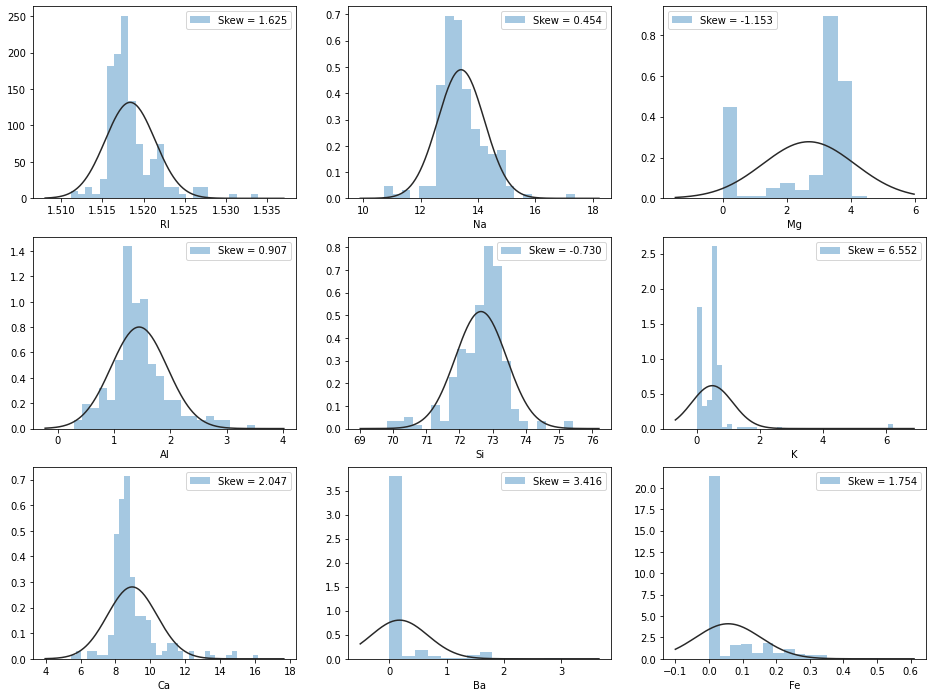

In [ ]:
# the data columns
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = ["Type of glass"]
fig,ax = plt.subplots(3,3, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    skew = glass_data[col].skew()
    sns.distplot(glass_data[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

None of the features are normally distributed and some have outliers

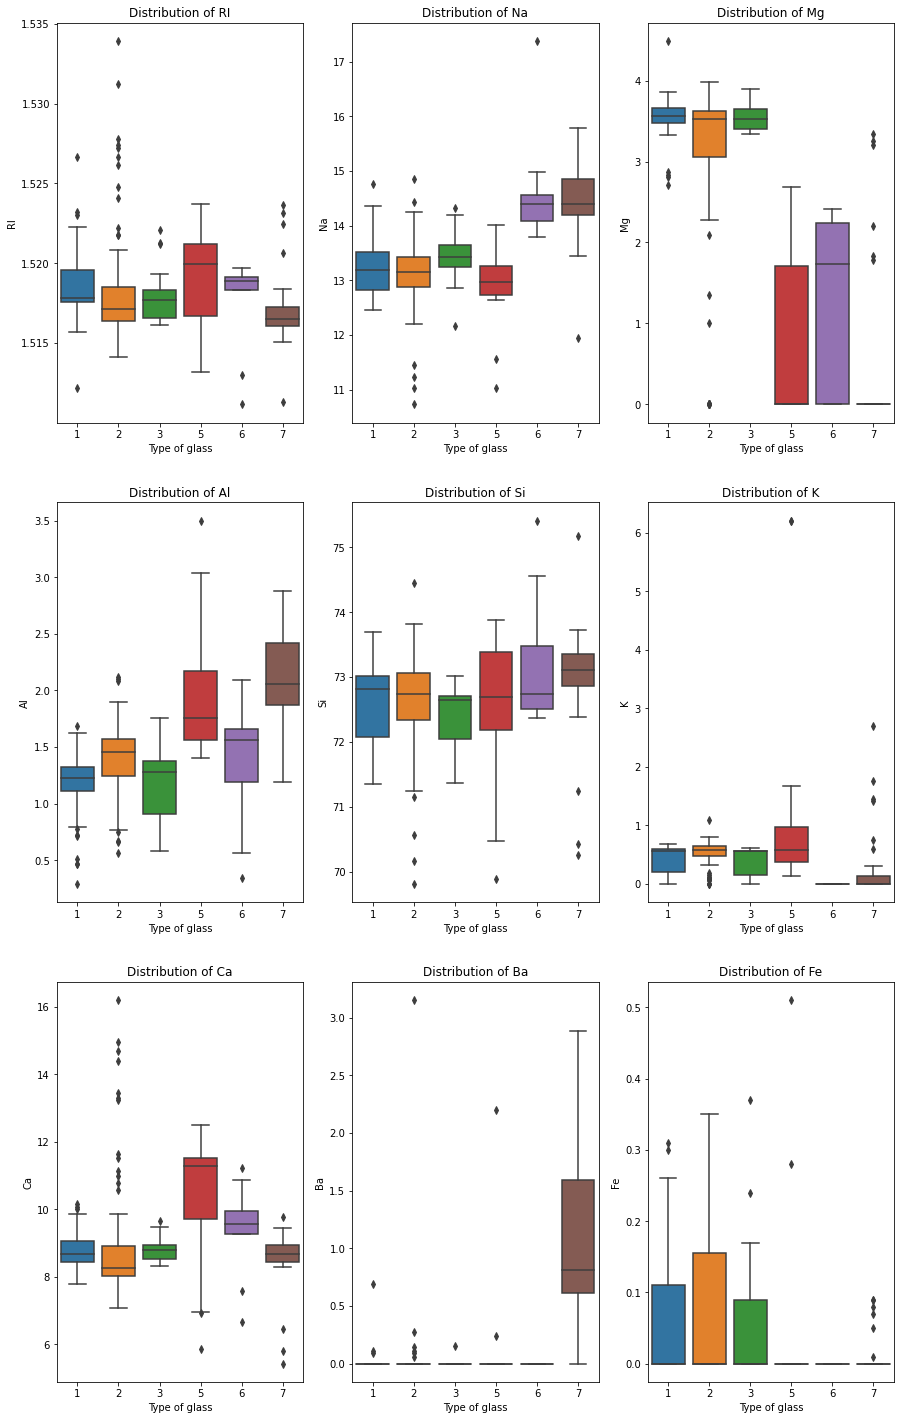

In [ ]:
plt.subplots(3,3,figsize=[15,25])
i=1
for cols in cols:
    plt.subplot(3,3,i)
    sns.boxplot(y=glass_data[cols],x=glass_data['Type of glass'])
    plt.title("Distribution of "+cols)
    i=i+1

Coreelation between each column using the heatmap

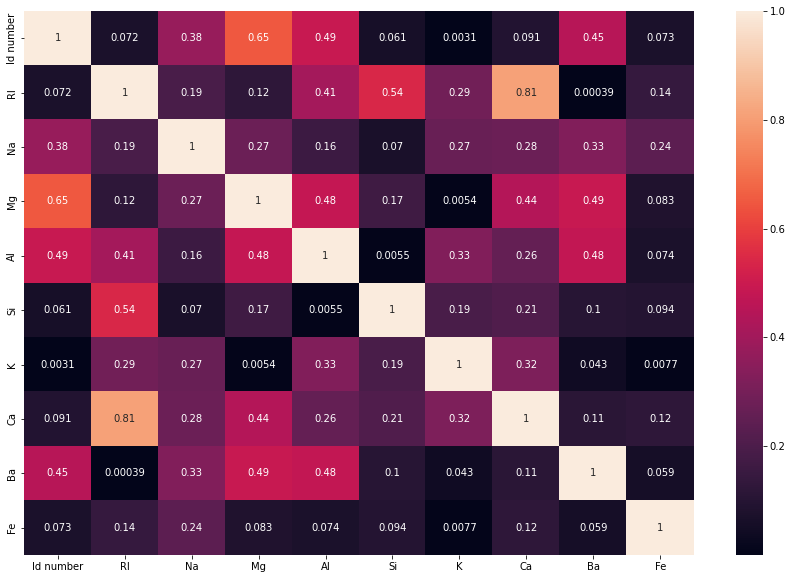

In [ ]:
data = glass_data.drop('Type of glass',axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(data.corr().abs(), annot= True)
plt.show()

Spliting the data into training and testing

In [ ]:
#Creating the variable  x and y
X = glass_data.drop("Type of glass", axis=1)
y = glass_data["Type of glass"]

In [ ]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#printing the shape of x_train,x_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(171, 10)
(171,)
(43, 10)
(43,)


Decision Tree

In [ ]:
#Creating the variable for object
classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0 ) #This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
#Fit X_train and Y_train to the classifier
classifier.fit(X_train, y_train)
#Making the prediction on X_test
y_pred = classifier.predict(X_test)
#Making the prediction on X_train
y_pred1 = classifier.predict(X_train)
#comparing actual response values (y_train with predicted response values (y_pred1)
DF_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("Decision Tree model accuracy(in %) for Training:",DF_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
DF_Test = metrics.accuracy_score(y_test, y_pred)*100
print("Descision Tree  model accuracy(in %) for Testing:", DF_Test)

Decision Tree model accuracy(in %) for Training: 100.0
Descision Tree  model accuracy(in %) for Testing: 95.34883720930233


Cross Validation using K - Fold

In [ ]:
#Split dataset into k consecutive folds (without shuffling by default)
#Creating the variable num_folds for how many no. of folds
num_folds = 5
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits = num_folds)
#Printing the results
results=cross_val_score(classifier,X_train,y_train,cv = kfold)
DF_result = results.mean()*100
print("CV-Accuracy for Testing:" , DF_result)

CV-Accuracy for Testing: 99.41176470588235


Confusion Matrix, Classification Report

In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 9  0  0  0  0  0]
 [ 0 18  1  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  1  1  0]
 [ 0  0  0  0  0  6]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.95      0.97        19
           3       0.83      1.00      0.91         5
           5       0.67      1.00      0.80         2
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         6

    accuracy                           0.95        43
   macro avg       0.92      0.91      0.89        43
weighted avg       0.97      0.95      0.95        43

Accuracy: 0.9534883720930233


Sensitivity and Specificity for Decision Tree

In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 
print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)

Sensitivity: 99.12280701754386
Specificity:  99.56140350877193


ROC- AUC Curve

ROC-AUC for Class 1: 1.0
ROC-AUC for Class 2: 0.9736842105263157
ROC-AUC for Class 3: 0.986842105263158
ROC-AUC for Class 4: nan
ROC-AUC for Class 5: 0.4878048780487805
ROC-AUC for Class 6: 0.4268292682926829


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


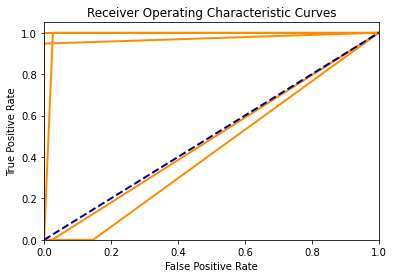

In [ ]:
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6])
n_classes = y_test_bin.shape[1]
#Calculate the y_score
y_score = classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('ROC-AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

Random Forest

In [ ]:
#Creating the variable for object
RFClassifier = RandomForestClassifier(n_estimators = 100 ,criterion='entropy', random_state = 0 ) #This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
#Fit X_train and Y_train to the classifier
RFClassifier.fit(X_train, y_train)
#Making the prediction on X_test
y_pred2 = RFClassifier.predict(X_test)
#Making the prediction on X_train
y_pred3 = RFClassifier.predict(X_train)
#comparing actual response values (y_train with predicted response values (y_pred1)
RF_Train = metrics.accuracy_score(y_train, y_pred3)*100
print("Random Forest model accuracy(in %) for Training:",RF_Train )
#comparing actual response values (y_test) with predicted response values (y_pred)
RF_Test = metrics.accuracy_score(y_test, y_pred2)*100
print("Random Forest model accuracy(in %) for Testing:", RF_Test)

Random Forest model accuracy(in %) for Training: 100.0
Random Forest model accuracy(in %) for Testing: 97.67441860465115


Cross Validation Using K - Fold

In [ ]:
#Split dataset into k consecutive folds (without shuffling by default)
#Creating the variable num_folds for how many no. of folds
num_folds = 5
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits = num_folds)
#Printing the results
results1 = cross_val_score(RFClassifier,X_train,y_train,cv = kfold)
RF_results = results1.mean()*100
print("CV-Accuracy :" , RF_results)

CV-Accuracy : 95.88235294117649


Confusion Matrix , Classification Report For Random Forest

In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(result2)
#Getting the classification report
result3 = classification_report(y_test, y_pred2)
print("Classification Report:",)
print (result3)
#Overall accuracy
result3 = accuracy_score(y_test,y_pred2)
print("Accuracy:",result3)

Confusion Matrix:
[[ 9  0  0  0  0  0]
 [ 0 18  1  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.95      0.97        19
           3       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.98        43
   macro avg       0.97      0.99      0.98        43
weighted avg       0.98      0.98      0.98        43

Accuracy: 0.9767441860465116


Sensitivity and Specificity For Random Forest

In [ ]:
FP = result2.sum(axis=0) - np.diag(result) 
FN = result2.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result2.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)

Sensitivity: 99.12280701754386
Specificity:  99.56140350877193


ROC - AUC Curve

ROC-AUC for Class 1: 1.0
ROC-AUC for Class 2: 1.0
ROC-AUC for Class 3: 0.9947368421052633
ROC-AUC for Class 4: nan
ROC-AUC for Class 5: 0.8109756097560975
ROC-AUC for Class 6: 0.7621951219512195


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


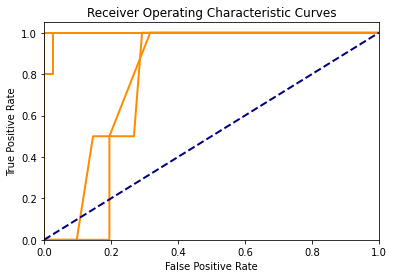

In [ ]:
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6])
n_classes = y_test_bin.shape[1]
#Calculate the y_score
y_score = RFClassifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('ROC-AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

Comparing the Accuracy For the both Model

In [ ]:
#Comparing the Model 
models =  [('Decision Tree Classification', DF_Train, DF_Test),('Random Forest Classification' , RF_Train, RF_Test)]
predict = pd.DataFrame(data = models , columns =['Model', 'Training Accuracy', 'Testing Accuracy'])
predict

,Model,Training Accuracy,Testing Accuracy
0,Decision Tree Classification,100.0,95.348837
1,Random Forest Classification,100.0,97.674419


In [ ]:
#Comparing the Model with Cross Validation
models1 =  [('Decision Tree Classification with Cross Validation', DF_result),('Random Forest Classification with Cross Validation' , RF_results)]
predict1 = pd.DataFrame(data = models1 , columns =['Model', 'Accuracy'])
predict1

,Model,Accuracy
0,Decision Tree Classification with Cross Valida...,99.411765
1,Random Forest Classification with Cross Valida...,95.882353
